# Assignemnt 3


# **Readme**

1.For Question1, I test the learning rate, batch size with Adam optimizer, then I test the SGD, RMSProp optimizer, the 3 complete different models are at the end of question 1, before question2.

2.For question2, I test the learning rate, batch size, then implement an equivalent feed forward network

3.For question3, just the code for convolutional operation

4.Report
https://github.com/RoboticsAndCloud/Machine_Learning_2022_Fall/blob/main/2022%20Machine%20Learning%20Assignment%203.pdf

**Question 1**

Design a convolutional neural network in Keras of at least 10 convolutional layers. Use the MNIST
dataset for evaluation. You must try three designs as detailed below and provide your
observations on the performance of each:
1. A regular CNN where the number of filters in each layer increases as the depth of the
network grows i.e., the Lth layer will have more filters than the (L-1)th layer.
2. An inverted CNN where the number of filters in each layer decreases as the depth of the
network grows i.e., the Lth layer will have less filters than the (L-1)th layer.
3. An hour-glass shaped CNN where the number of filters will increase till the Lth layer and
reduce afterwards.
Your goal is to design these networks and optimize them to their best performance by choosing
the right hyperparameters for each network, such as the learning rate, batch size and the choice
of optimizer (‘SGD’, ‘adam’, ‘RMSProp’). You must provide a detailed report of what values you
tried for each hyperparameters, your observations on why the network performed well (or not)
and the final accuracy for each network on the MNIST dataset.

In [ ]:
!sudo pip3 install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


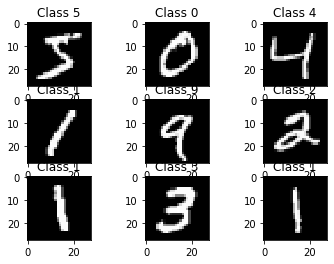

In [ ]:
# Reference: https://github.com/yashk2810/MNIST-Keras/blob/master/Notebook/MNIST_keras_CNN-99.55%25.ipynb
# https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb
# https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/16_cnn_cifar10_small_image_classification/cnn_cifar10_dataset.ipynb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
# from keras.layers.advanced_activations import LeakyReLU 
from keras.layers import ELU, PReLU, LeakyReLU

from keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)


# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

# Display the samples
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

# reshape the data to (28,28)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

number_of_classes = 10

# Converts a class vector (integers) to binary class matrix.
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [ ]:
# Define models 

model = Sequential()

model.add(Conv2D(6, (3, 3), activation='relu', input_shape=(28,28,1)))
BatchNormalization(axis=-1)

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(82, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

# Flattening is a technique that is used to convert multi-dimensional arrays into a 1-D array
model.add(Flatten())
model.add(BatchNormalization(axis=-1))

# Fully connected layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))

print("Layers:", len(model.layers))
print("Layers:", model.layers)
model.summary()


Layers: 20
Layers: [<keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b8d25c9d0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b8459c350>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8b8c187e10>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b88ce8ed0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8b89de93d0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b8c14e590>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8b85c4ec10>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b87b94450>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8b87b86450>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b87b86f10>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8b87b7bf10>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b87bab190>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8b87b7b290>, <keras.layers.reshaping.flatten.Flatten o

Epoch 1/2
469/469 [==============================] - 73s 153ms/step - loss: 0.1078 - accuracy: 0.9662 - val_loss: 0.5246 - val_accuracy: 0.8152
Epoch 2/2
313/313 [==============================] - 3s 11ms/step - loss: 0.1715 - accuracy: 0.9546

Test score: 0.17154338955879211
Test accuracy:  0.9545999765396118
313/313 [==============================] - 4s 11ms/step


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8b8d395150>)

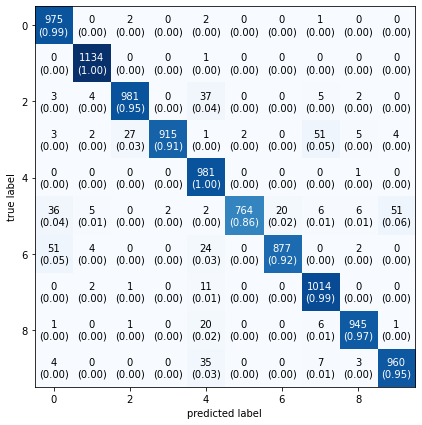

In [ ]:
learning_rate = 0.001
batch_size = 128
# 16 min 

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=2,
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test)
print()
print('Test score:', score[0])
print('Test accuracy: ', score[1])

predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

# predictions = list(predictions)
# actuals = list(y_test)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

label_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))


Learning rate and batch size testing

Epoch 1/2
469/469 [==============================] - 87s 181ms/step - loss: 0.1518 - accuracy: 0.9559 - val_loss: 1.3037 - val_accuracy: 0.7464
Epoch 2/2
313/313 [==============================] - 4s 11ms/step - loss: 1.1452 - accuracy: 0.7572

Test score: 1.1452314853668213
Test accuracy:  0.7572000026702881
313/313 [==============================] - 4s 11ms/step


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8b8ebaadd0>)

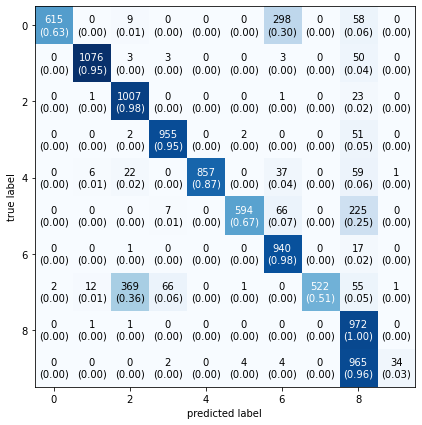

In [ ]:
learning_rate = 0.01
batch_size = 128


model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=2,
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test)
print()
print('Test score:', score[0])
print('Test accuracy: ', score[1])

predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

# predictions = list(predictions)
# actuals = list(y_test)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

Epoch 1/2
469/469 [==============================] - 73s 155ms/step - loss: 0.0095 - accuracy: 0.9971 - val_loss: 0.0218 - val_accuracy: 0.9941
Epoch 2/2
313/313 [==============================] - 4s 11ms/step - loss: 0.0215 - accuracy: 0.9938

Test score: 0.021536948159337044
Test accuracy:  0.9937999844551086
313/313 [==============================] - 4s 11ms/step


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8b7b248b90>)

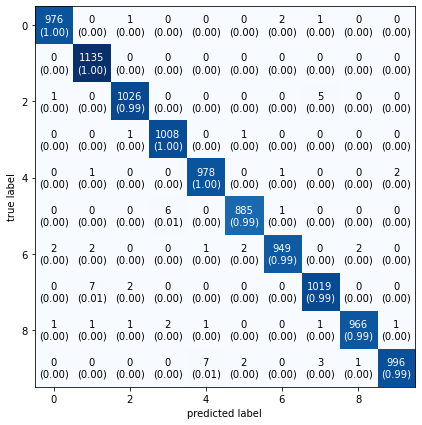

In [ ]:
learning_rate = 0.0001
batch_size = 128

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=2,
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test)
print()
print('Test score:', score[0])
print('Test accuracy: ', score[1])

predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

# predictions = list(predictions)
# actuals = list(y_test)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

Epoch 1/2
118/118 [==============================] - 66s 546ms/step - loss: 0.0224 - accuracy: 0.9934 - val_loss: 0.0323 - val_accuracy: 0.9898
Epoch 2/2
313/313 [==============================] - 4s 12ms/step - loss: 0.0240 - accuracy: 0.9926

Test score: 0.024000851437449455
Test accuracy:  0.9926000237464905
313/313 [==============================] - 4s 11ms/step


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8b85bc9b90>)

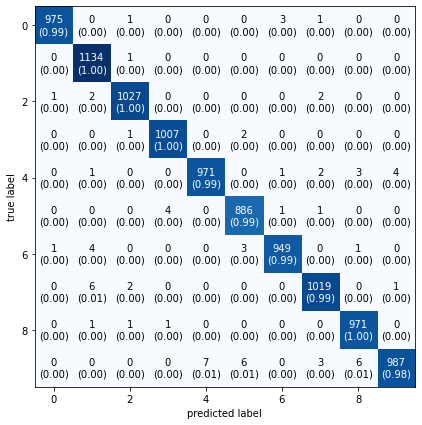

In [ ]:
learning_rate = 0.001
batch_size = 512
# 

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=2,
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test)
print()
print('Test score:', score[0])
print('Test accuracy: ', score[1])

predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

# predictions = list(predictions)
# actuals = list(y_test)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

Epoch 1/2
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0365 - accuracy: 0.9887 - val_loss: 0.0266 - val_accuracy: 0.9918
Epoch 2/2
313/313 [==============================] - 4s 11ms/step - loss: 0.0471 - accuracy: 0.9881

Test score: 0.047129206359386444
Test accuracy:  0.988099992275238
313/313 [==============================] - 4s 11ms/step


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8b8cd43950>)

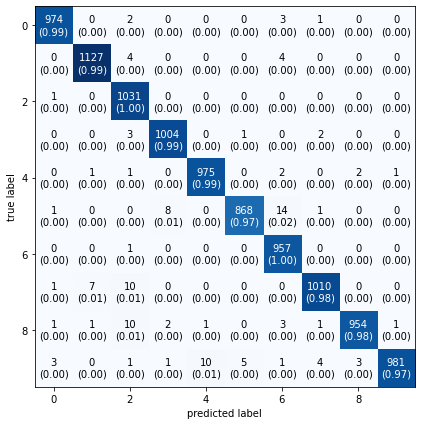

In [ ]:
learning_rate = 0.001
batch_size = 32
# 

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=2,
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test)
print()
print('Test score:', score[0])
print('Test accuracy: ', score[1])

predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

# predictions = list(predictions)
# actuals = list(y_test)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

label_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

SGD optimizer

Epoch 1/2
469/469 [==============================] - 74s 156ms/step - loss: 0.0187 - accuracy: 0.9941 - val_loss: 0.0323 - val_accuracy: 0.9906
Epoch 2/2
313/313 [==============================] - 4s 12ms/step - loss: 0.0318 - accuracy: 0.9906

Test score: 0.03184907138347626
Test accuracy:  0.9905999898910522
313/313 [==============================] - 4s 11ms/step


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8b84aa91d0>)

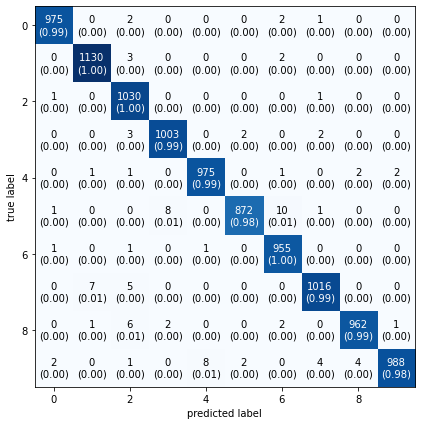

In [ ]:
learning_rate = 0.0001
batch_size = 128
# 

from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=learning_rate), metrics=['accuracy'])
model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=2,
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test)
print()
print('Test score:', score[0])
print('Test accuracy: ', score[1])

predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

# predictions = list(predictions)
# actuals = list(y_test)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

RMSProp optimizer

Epoch 1/2
469/469 [==============================] - 73s 152ms/step - loss: 0.0128 - accuracy: 0.9959 - val_loss: 0.0227 - val_accuracy: 0.9934
Epoch 2/2
313/313 [==============================] - 4s 11ms/step - loss: 0.0220 - accuracy: 0.9934

Test score: 0.022028261795639992
Test accuracy:  0.993399977684021
313/313 [==============================] - 4s 11ms/step


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8b846e5890>)

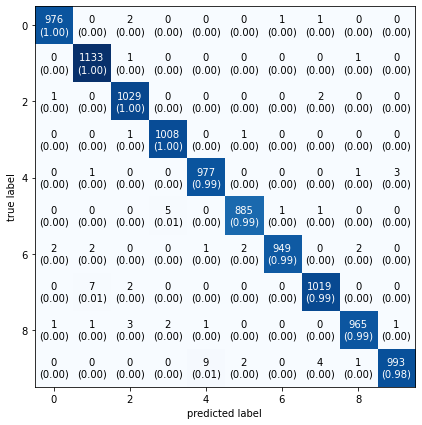

In [ ]:
learning_rate = 0.0001
batch_size = 128
# 

from keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=learning_rate), metrics=['accuracy'])
model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=2,
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test)
print()
print('Test score:', score[0])
print('Test accuracy: ', score[1])

predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

# predictions = list(predictions)
# actuals = list(y_test)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

label_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

10 epochs

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)
Layers: 20
Layers: [<keras.layers.convolutional.conv2d.Conv2D object at 0x7f39cc5e0390>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f39c80e1f50>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f39cc5e0210>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f39c80e1d50>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f39c858b310>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f39c3945190>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f39c8100750>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f39c38f6fd0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f39c38d9f90>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f39c3945ad0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f39c393be10>, <keras.layers.convolutional.conv2d.Conv2D obje

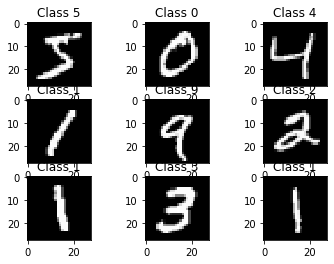

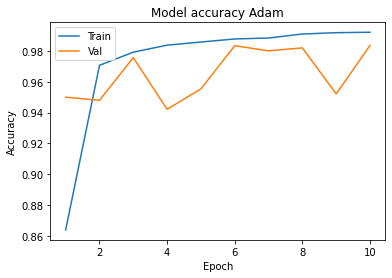

<Figure size 432x288 with 0 Axes>

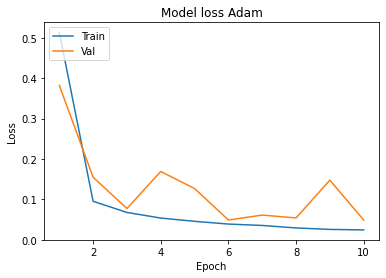

313/313 [==============================] - 5s 15ms/step - loss: 0.0489 - accuracy: 0.9836

Test score: 0.04885516315698624
Test accuracy:  0.9836000204086304
313/313 [==============================] - 5s 15ms/step
Epoch 1/10
469/469 [==============================] - 95s 201ms/step - loss: 0.0189 - accuracy: 0.9943 - val_loss: 0.0317 - val_accuracy: 0.9898
Epoch 2/10
469/469 [==============================] - 95s 202ms/step - loss: 0.0177 - accuracy: 0.9944 - val_loss: 0.0312 - val_accuracy: 0.9900
Epoch 3/10
469/469 [==============================] - 93s 198ms/step - loss: 0.0173 - accuracy: 0.9946 - val_loss: 0.0312 - val_accuracy: 0.9902
Epoch 4/10
469/469 [==============================] - 94s 201ms/step - loss: 0.0168 - accuracy: 0.9949 - val_loss: 0.0308 - val_accuracy: 0.9902
Epoch 5/10
469/469 [==============================] - 92s 197ms/step - loss: 0.0160 - accuracy: 0.9951 - val_loss: 0.0306 - val_accuracy: 0.9903
Epoch 6/10
469/469 [==============================] - 93s 199

<Figure size 432x288 with 0 Axes>

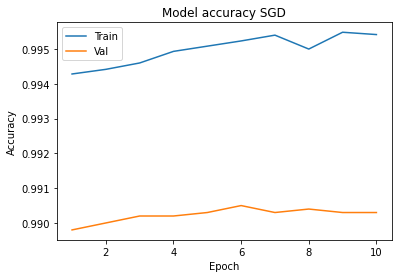

<Figure size 432x288 with 0 Axes>

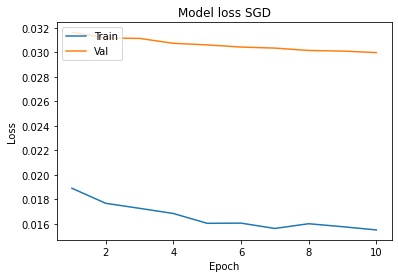

313/313 [==============================] - 5s 15ms/step - loss: 0.0300 - accuracy: 0.9903

Test score: 0.02999291941523552
Test accuracy:  0.9902999997138977
313/313 [==============================] - 5s 15ms/step
Epoch 1/10
469/469 [==============================] - 98s 204ms/step - loss: 0.0213 - accuracy: 0.9929 - val_loss: 0.1244 - val_accuracy: 0.9632
Epoch 2/10
469/469 [==============================] - 94s 200ms/step - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.0479 - val_accuracy: 0.9859
Epoch 3/10
469/469 [==============================] - 96s 204ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.0427 - val_accuracy: 0.9865
Epoch 4/10
469/469 [==============================] - 95s 203ms/step - loss: 0.0155 - accuracy: 0.9951 - val_loss: 0.0392 - val_accuracy: 0.9883
Epoch 5/10
469/469 [==============================] - 94s 201ms/step - loss: 0.0146 - accuracy: 0.9954 - val_loss: 0.0434 - val_accuracy: 0.9878
Epoch 6/10
469/469 [==============================] - 95s 203

<Figure size 432x288 with 0 Axes>

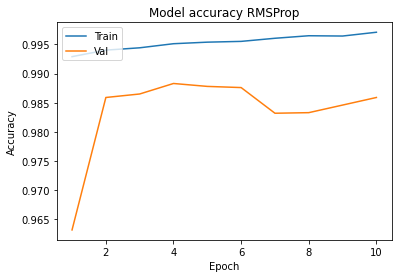

<Figure size 432x288 with 0 Axes>

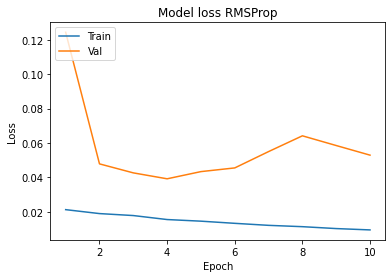

313/313 [==============================] - 5s 15ms/step - loss: 0.0530 - accuracy: 0.9859

Test score: 0.0529598705470562
Test accuracy:  0.9858999848365784
313/313 [==============================] - 7s 20ms/step


<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
# from keras.layers.advanced_activations import LeakyReLU 
from keras.layers import ELU, PReLU, LeakyReLU

from keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)


# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

# Display the samples
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

# reshape the data to (28,28)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

number_of_classes = 10

# Converts a class vector (integers) to binary class matrix.
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)


def plot_learningCurve(history, epochs, comment = ''):
  # Plot training & validation accuracy values
  plt.figure()
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy' + ' ' + comment)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
  plt.savefig("accuracy.png")

  # Plot training & validation loss values
  plt.figure()
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss'+ ' ' + comment)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
  plt.savefig("loss.png")

epochs = 10
learning_rate = 0.0001
batch_size = 128
# 

model = Sequential()

model.add(Conv2D(6, (3, 3), activation='relu', input_shape=(28,28,1)))
BatchNormalization(axis=-1)

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(82, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

# Flattening is a technique that is used to convert multi-dimensional arrays into a 1-D array
model.add(Flatten())
model.add(BatchNormalization(axis=-1))

# Fully connected layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))

print("Layers:", len(model.layers))
print("Layers:", model.layers)
model.summary()


model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=epochs,
          validation_data=(X_test, Y_test))

plot_learningCurve(history, epochs, comment = 'Adam')

score = model.evaluate(X_test, Y_test)
print()
print('Test score:', score[0])
print('Test accuracy: ', score[1])

predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

# predictions = list(predictions)
# actuals = list(y_test)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix



from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=learning_rate), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=epochs,
          validation_data=(X_test, Y_test))

plot_learningCurve(history, epochs, comment = 'SGD')

score = model.evaluate(X_test, Y_test)
print()
print('Test score:', score[0])
print('Test accuracy: ', score[1])

predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

# predictions = list(predictions)
# actuals = list(y_test)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# mat = confusion_matrix(y_test, y_pred)
# plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

# 

from keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=learning_rate), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=epochs,
          validation_data=(X_test, Y_test))

plot_learningCurve(history, epochs, comment = 'RMSProp')

score = model.evaluate(X_test, Y_test)
print()
print('Test score:', score[0])
print('Test accuracy: ', score[1])

predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

# predictions = list(predictions)
# actuals = list(y_test)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# mat = confusion_matrix(y_test, y_pred)
# plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))




Complete code Model 1

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)
Layers: 20
Layers: [<keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b72394f90>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b79bf9fd0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8b72394f50>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b7af22d90>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8b9421c650>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b79b557d0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8b7aec87d0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b79bf6990>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8b723f89d0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b79bfcf90>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8b723ec050>, <keras.layers.convolutional.conv2d.Conv2D obje

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8b7b44fed0>)

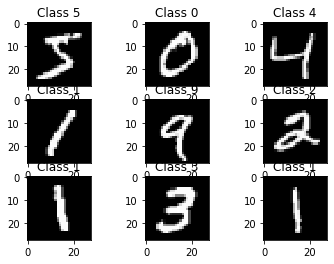

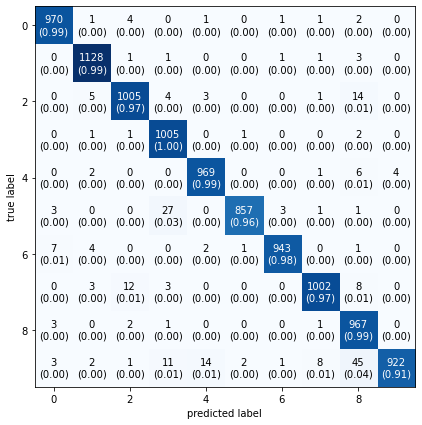

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
# from keras.layers.advanced_activations import LeakyReLU 
from keras.layers import ELU, PReLU, LeakyReLU

from keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)


# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

# Display the samples
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

# reshape the data to (28,28)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

number_of_classes = 10

# Converts a class vector (integers) to binary class matrix.
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)
# Define models 

model = Sequential()

model.add(Conv2D(6, (3, 3), activation='relu', input_shape=(28,28,1)))
BatchNormalization(axis=-1)

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(82, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

# Flattening is a technique that is used to convert multi-dimensional arrays into a 1-D array
model.add(Flatten())
model.add(BatchNormalization(axis=-1))

# Fully connected layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))

print("Layers:", len(model.layers))
print("Layers:", model.layers)
model.summary()


epochs = 2
learning_rate = 0.001
batch_size = 128
# 

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=epochs ,
          validation_data=(X_test, Y_test))


score = model.evaluate(X_test, Y_test)
print()
print('Test score:', score[0])
print('Test accuracy: ', score[1])

predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

# predictions = list(predictions)
# actuals = list(y_test)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))



Model 2: An inverted CNN where the number of filters in each layer decreases as the depth of the
network grows i.e., the Lth layer will have less filters than the (L-1)th layer.

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)
Layers: 20
Layers: [<keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b7241fc90>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b72439cd0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8b7241fc50>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b79951950>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8b79951fd0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b72428d10>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8b72439350>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b723ebb90>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8b723f3fd0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b723dccd0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8b723ffd90>, <keras.layers.convolutional.conv2d.Conv2D obje

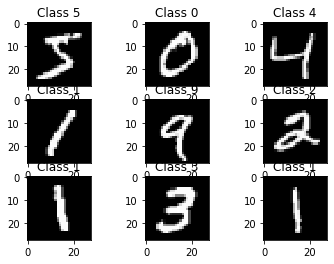

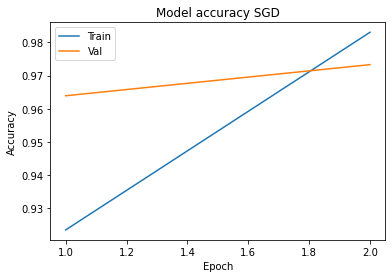

<Figure size 432x288 with 0 Axes>

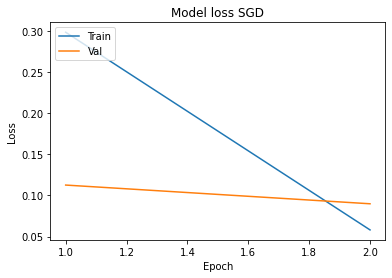

313/313 [==============================] - 61s 194ms/step - loss: 0.0899 - accuracy: 0.9733

Test score: 0.08991572260856628
Test accuracy:  0.9732999801635742
313/313 [==============================] - 60s 193ms/step


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8b940d3a90>)

<Figure size 432x288 with 0 Axes>

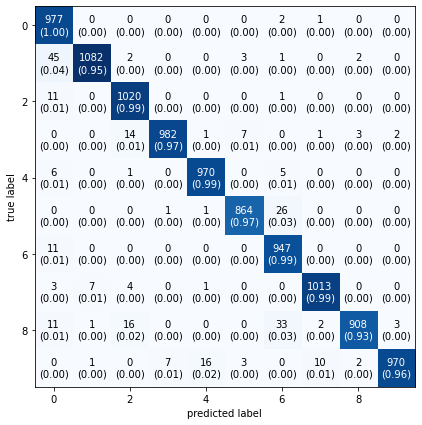

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
# from keras.layers.advanced_activations import LeakyReLU 
from keras.layers import ELU, PReLU, LeakyReLU

from keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)


# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

# Display the samples
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

# reshape the data to (28,28)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

number_of_classes = 10

# Converts a class vector (integers) to binary class matrix.
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

# Define models 
model = Sequential()
model.add(Conv2D(256, (3, 3), activation='relu', input_shape=(28,28,1)))
BatchNormalization(axis=-1)

model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(82, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(6, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

# Flattening is a technique that is used to convert multi-dimensional arrays into a 1-D array
model.add(Flatten())
model.add(BatchNormalization(axis=-1))

# Fully connected layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))

print("Layers:", len(model.layers))
print("Layers:", model.layers)
model.summary()


epochs = 5
learning_rate = 0.001
batch_size = 128
# 

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=epochs ,
          validation_data=(X_test, Y_test))

plot_learningCurve(history, epochs, 'SGD')

score = model.evaluate(X_test, Y_test)
print()
print('Test score:', score[0])
print('Test accuracy: ', score[1])

predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

# predictions = list(predictions)
# actuals = list(y_test)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))




Model 3:An hour-glass shaped CNN where the number of filters will increase till the Lth layer and
reduce afterwards.

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)
Layers: 20
Layers: [<keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b8eccd690>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b85e23b10>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8b8eccd5d0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b94903ad0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8b72395410>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b8d1f7410>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8b8dcf5550>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b8dccadd0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8b85e3ef90>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f8b85e3eed0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8b8cd43b90>, <keras.layers.convolutional.conv2d.Conv2D obje

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8b8c1d91d0>)

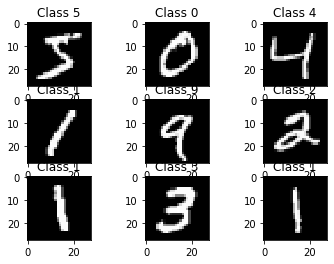

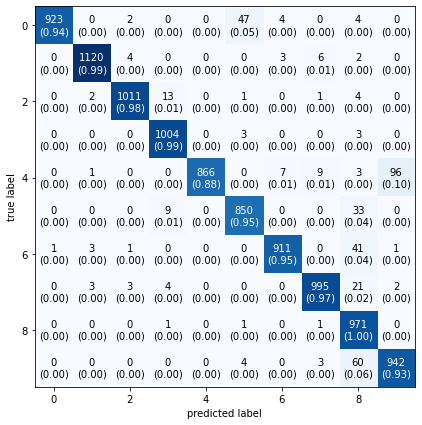

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
# from keras.layers.advanced_activations import LeakyReLU 
from keras.layers import ELU, PReLU, LeakyReLU

from keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)


# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

# Display the samples
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

# reshape the data to (28,28)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

number_of_classes = 10

# Converts a class vector (integers) to binary class matrix.
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

# Define models 

model = Sequential()

model.add(Conv2D(6, (3, 3), activation='relu', input_shape=(28,28,1)))
BatchNormalization(axis=-1)

model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(6, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

# Flattening is a technique that is used to convert multi-dimensional arrays into a 1-D array
model.add(Flatten())
model.add(BatchNormalization(axis=-1))

# Fully connected layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))

print("Layers:", len(model.layers))
print("Layers:", model.layers)
model.summary()


import matplotlib.pyplot as plt

learning_rate = 0.001
batch_size = 128
# 

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=2,
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test)
print()
print('Test score:', score[0])
print('Test accuracy: ', score[1])

predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

# predictions = list(predictions)
# actuals = list(y_test)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))




**Question2**

Implement the LeNet Convolutional Neural Network using Keras. It is a seven-layer network with
three convolutional layers, two max-pooling layers and 2 dense layers. The structure is shown
below:
Layer 1: convolution layer with 6 convolution kernels of 5x5 with stride 1
Layer 2: max-pooling layer with 2x2 kernels with stride 2
Layer 3: convolution layer with 16 convolution kernels of 5x5 with stride 1
Layer 4: max-pooling layer with 2x2 kernels with stride 2
Layer 5: convolution layer with 120 convolution kernels of 5x5
Layer 6: dense layer with 84 neurons
Layer 7: output layer
Use the ‘Adam’ optimizer to train your network on the CIFAR-10 dataset for a fixed set of 25
epochs. You can use the built-in functions to load the data. Each image is 32x32x3 matrix and you
will have 60,000 images for training and 10,000 for test. There are 10 classes in the dataset each
representing an object in the image.
Perform the following analysis and answer each question briefly (3-5 sentences). Use plots and figures as necessary.

1. What is the effect of learning rate on the training process? Which performed best?
2. What is the effect of batch size on the training process? Which performed best?
3. Try different hyperparameters to obtain the best accuracy on the test set. What is your
best performance and what were the hyperparameters?
4. Implement an equivalent feed forward network for the same task with each hidden layer
containing the same number of neurons as the number of filters in each convolution layer.
Use the ‘Adam’ optimizer to train your network on the CIFAR-10 dataset for a fixed set of
25 epochs. Compare its performance with your LeNet implementation based on the
following questions:
a. What is its performance?
b. How many parameters are there in this network compared to the LeNet
implementation? Are they worth it?


170498071/170498071 [==============================] - 6s 0us/step
X_train original shape (50000, 32, 32, 3)
y_train original shape (50000, 1)
X_test original shape (10000, 32, 32, 3)
y_test original shape (10000, 1)
(32, 32, 3)
y_test: [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
YY_test: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


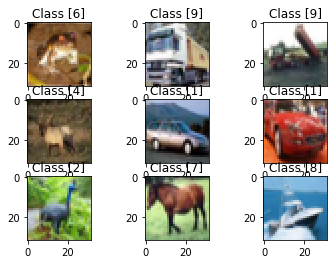

In [ ]:
# https://github.com/yashk2810/MNIST-Keras/blob/master/Notebook/MNIST_keras_CNN-99.55%25.ipynb
# https://github.com/raahatg21/CIFAR-10-Dataset-with-Keras/blob/master/CIFAR-10_8392.ipynb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
# from keras.layers.advanced_activations import LeakyReLU 
from keras.layers import ELU, PReLU, LeakyReLU

from keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)


# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

# Display the samples
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

# # reshape the data to (28,28)
# X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
# X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape[1:])

number_of_classes = 10

# Converts a class vector (integers) to binary class matrix.
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

print('y_test:', y_test)
print('YY_test:', Y_test[0])



In [ ]:
# Define LeNet model
LeNet = Sequential()

LeNet.add(Conv2D(6, (5,5), activation = 'relu', input_shape= (32,32,3), strides=1, padding='same'))
LeNet.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))

LeNet.add(Conv2D(16, (5,5), activation = 'relu', strides=1, padding='same'))
LeNet.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))

LeNet.add(Conv2D(120, (5,5), activation = 'relu', padding='same'))

LeNet.add(Flatten())
LeNet.add(Dense(84, activation='relu'))
LeNet.add(Dense(10, activation='softmax'))

print("Layers:", len(LeNet.layers))
print("Layers:", LeNet.layers)
LeNet.summary()

Layers: 8
Layers: [<keras.layers.convolutional.conv2d.Conv2D object at 0x7f88bdd2f710>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f884d8490d0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f884d760710>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f884d733bd0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f88bdd2f3d0>, <keras.layers.reshaping.flatten.Flatten object at 0x7f8849026690>, <keras.layers.core.dense.Dense object at 0x7f884d807110>, <keras.layers.core.dense.Dense object at 0x7f884d7481d0>]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 6)        0         
 )                                                               
                       

Epoch 1/25
391/391 [==============================] - 63s 159ms/step - loss: 1.8901 - accuracy: 0.3232 - val_loss: 1.7033 - val_accuracy: 0.3893
Epoch 2/25
391/391 [==============================] - 64s 164ms/step - loss: 1.6352 - accuracy: 0.4171 - val_loss: 1.5741 - val_accuracy: 0.4382
Epoch 3/25
391/391 [==============================] - 62s 159ms/step - loss: 1.5397 - accuracy: 0.4509 - val_loss: 1.5160 - val_accuracy: 0.4602
Epoch 4/25
391/391 [==============================] - 63s 162ms/step - loss: 1.4771 - accuracy: 0.4755 - val_loss: 1.4543 - val_accuracy: 0.4782
Epoch 5/25
391/391 [==============================] - 63s 161ms/step - loss: 1.4250 - accuracy: 0.4935 - val_loss: 1.3965 - val_accuracy: 0.4984
Epoch 6/25
391/391 [==============================] - 62s 159ms/step - loss: 1.3788 - accuracy: 0.5110 - val_loss: 1.3720 - val_accuracy: 0.5137
Epoch 7/25
391/391 [==============================] - 64s 163ms/step - loss: 1.3415 - accuracy: 0.5249 - val_loss: 1.3269 - val_ac

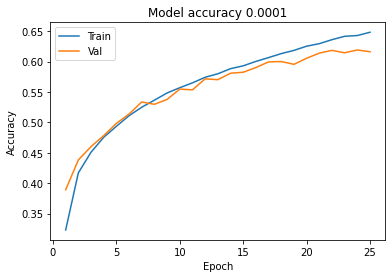

<Figure size 432x288 with 0 Axes>

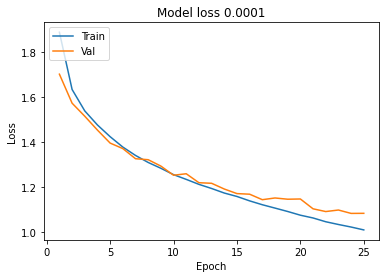

313/313 [==============================] - 6s 18ms/step - loss: 1.0838 - accuracy: 0.6161

Test score: 1.0837750434875488
Test accuracy:  0.616100013256073
313/313 [==============================] - 5s 17ms/step
10000
y_pred: 3


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8b8eb7e350>)

<Figure size 432x288 with 0 Axes>

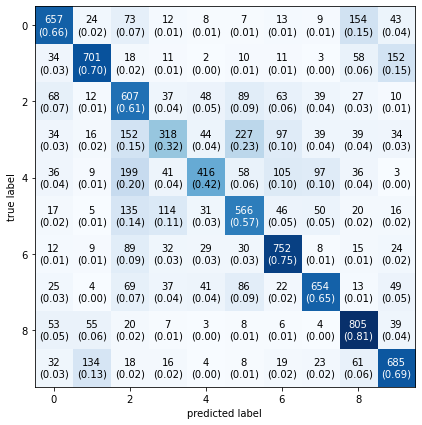

In [ ]:
import matplotlib.pyplot as plt


def plot_learningCurve(history, epochs, comment = ''):
  # Plot training & validation accuracy values
  plt.figure()
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy' + ' ' + comment)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
  plt.savefig("accuracy.png")

  # Plot training & validation loss values
  plt.figure()
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss'+ ' ' + comment)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
  plt.savefig("loss.png")


epochs = 25
learning_rate = 0.0001
batch_size = 128

model = LeNet

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=epochs,
          validation_data=(X_test, Y_test))

plot_learningCurve(history, epochs, str(learning_rate))

score = model.evaluate(X_test, Y_test)
print()
print('Test score:', score[0])
print('Test accuracy: ', score[1])


predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

# predictions = list(predictions)
# actuals = list(y_test)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

print(len(y_pred))
print('y_pred:', y_pred[0])
# print(y_pred)
# print('------------------')
# print(y_test)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

Layers: 8
Layers: [<keras.layers.convolutional.conv2d.Conv2D object at 0x7f883970d410>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8844815a50>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f884d947910>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f883d2ef410>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f883970a550>, <keras.layers.reshaping.flatten.Flatten object at 0x7f88464b40d0>, <keras.layers.core.dense.Dense object at 0x7f883983f290>, <keras.layers.core.dense.Dense object at 0x7f88464aee50>]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 6)        0         
 2D)                                                             
                     

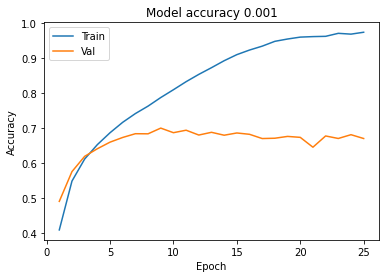

<Figure size 432x288 with 0 Axes>

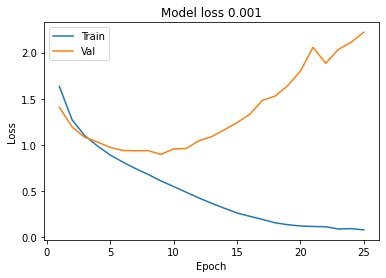

313/313 [==============================] - 8s 26ms/step - loss: 2.2203 - accuracy: 0.6695

Test score: 2.2203168869018555
Test accuracy:  0.6694999933242798
313/313 [==============================] - 8s 26ms/step
10000
y_pred: 3


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8846a60fd0>)

<Figure size 432x288 with 0 Axes>

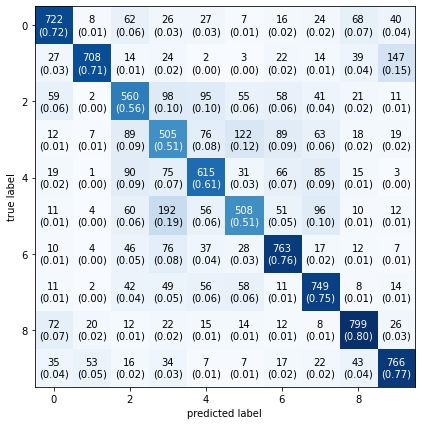

In [ ]:
### learning_rate = 0.001

# Define LeNet model
LeNet = Sequential()

LeNet.add(Conv2D(6, (5,5), activation = 'relu', input_shape= (32,32,3), strides=1, padding='same'))
LeNet.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))

LeNet.add(Conv2D(16, (5,5), activation = 'relu', strides=1, padding='same'))
LeNet.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))

LeNet.add(Conv2D(120, (5,5), activation = 'relu', padding='same'))

LeNet.add(Flatten())
LeNet.add(Dense(84, activation='relu'))
LeNet.add(Dense(10, activation='softmax'))

print("Layers:", len(LeNet.layers))
print("Layers:", LeNet.layers)
LeNet.summary()

epochs = 25
learning_rate = 0.001
batch_size = 128

model = LeNet

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=epochs,
          validation_data=(X_test, Y_test))

plot_learningCurve(history, epochs, str(learning_rate))

score = model.evaluate(X_test, Y_test)
print()
print('Test score:', score[0])
print('Test accuracy: ', score[1])


predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

# predictions = list(predictions)
# actuals = list(y_test)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

print(len(y_pred))
print('y_pred:', y_pred[0])
# print(y_pred)
# print('------------------')
# print(y_test)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

Layers: 8
Layers: [<keras.layers.convolutional.conv2d.Conv2D object at 0x7f8846b0dbd0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8846b0d410>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f8846b56490>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f884699fb50>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f8846ae8550>, <keras.layers.reshaping.flatten.Flatten object at 0x7f884696ec90>, <keras.layers.core.dense.Dense object at 0x7f884696add0>, <keras.layers.core.dense.Dense object at 0x7f88469d9990>]
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 6)        0         
 2D)                                                             
                     

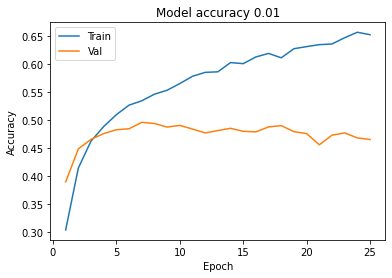

<Figure size 432x288 with 0 Axes>

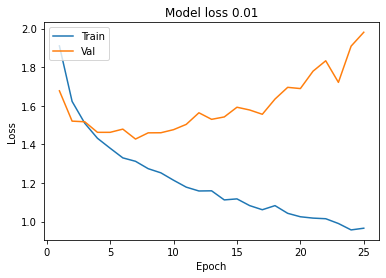

313/313 [==============================] - 8s 27ms/step - loss: 1.9812 - accuracy: 0.4648

Test score: 1.9812290668487549
Test accuracy:  0.46480000019073486
313/313 [==============================] - 8s 26ms/step
10000
y_pred: 1


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8846694250>)

<Figure size 432x288 with 0 Axes>

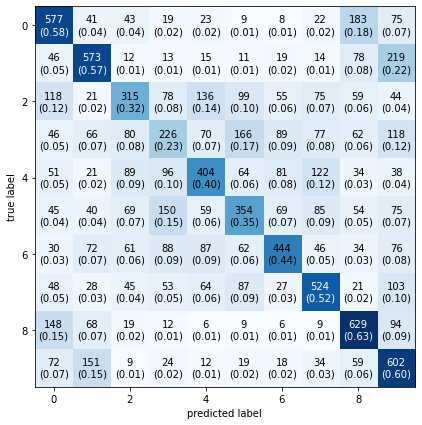

In [ ]:

# Define LeNet model
LeNet = Sequential()

LeNet.add(Conv2D(6, (5,5), activation = 'relu', input_shape= (32,32,3), strides=1, padding='same'))
LeNet.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))

LeNet.add(Conv2D(16, (5,5), activation = 'relu', strides=1, padding='same'))
LeNet.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))

LeNet.add(Conv2D(120, (5,5), activation = 'relu', padding='same'))

LeNet.add(Flatten())
LeNet.add(Dense(84, activation='relu'))
LeNet.add(Dense(10, activation='softmax'))

print("Layers:", len(LeNet.layers))
print("Layers:", LeNet.layers)
LeNet.summary()

### learning_rate = 0.01

epochs = 25
learning_rate = 0.01
batch_size = 128

model = LeNet

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=epochs,
          validation_data=(X_test, Y_test))

plot_learningCurve(history, epochs, str(learning_rate))

score = model.evaluate(X_test, Y_test)
print()
print('Test score:', score[0])
print('Test accuracy: ', score[1])


predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

# predictions = list(predictions)
# actuals = list(y_test)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

print(len(y_pred))
print('y_pred:', y_pred[0])
# print(y_pred)
# print('------------------')
# print(y_test)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

Layers: 8
Layers: [<keras.layers.convolutional.conv2d.Conv2D object at 0x7f39d291dd10>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f39d27e73d0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f39c9af4f90>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f39c9b472d0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f39c9afe110>, <keras.layers.reshaping.flatten.Flatten object at 0x7f39c9b01490>, <keras.layers.core.dense.Dense object at 0x7f39c9a90f50>, <keras.layers.core.dense.Dense object at 0x7f39c9afe150>]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 6)        0         
 2D)                                                             
                     

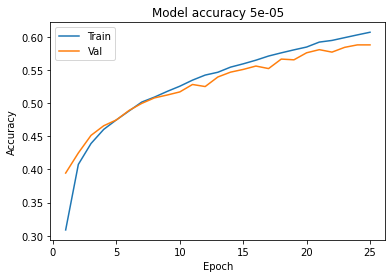

<Figure size 432x288 with 0 Axes>

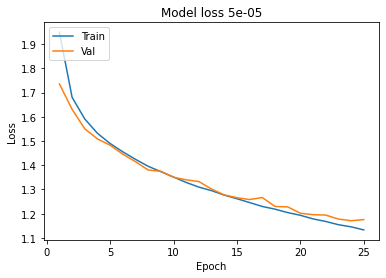

313/313 [==============================] - 9s 27ms/step - loss: 1.1755 - accuracy: 0.5877

Test score: 1.1755454540252686
Test accuracy:  0.5877000093460083
313/313 [==============================] - 8s 27ms/step
10000
y_pred: 3


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f39cd698c50>)

<Figure size 432x288 with 0 Axes>

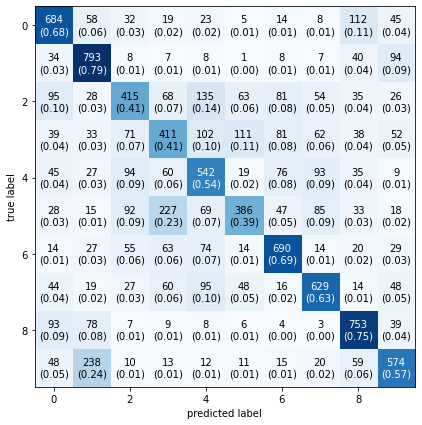

In [ ]:
import matplotlib.pyplot as plt

# Define LeNet model
LeNet = Sequential()

LeNet.add(Conv2D(6, (5,5), activation = 'relu', input_shape= (32,32,3), strides=1, padding='same'))
LeNet.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))

LeNet.add(Conv2D(16, (5,5), activation = 'relu', strides=1, padding='same'))
LeNet.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))

LeNet.add(Conv2D(120, (5,5), activation = 'relu', padding='same'))

LeNet.add(Flatten())
LeNet.add(Dense(84, activation='relu'))
LeNet.add(Dense(10, activation='softmax'))

print("Layers:", len(LeNet.layers))
print("Layers:", LeNet.layers)
LeNet.summary()

def plot_learningCurve(history, epochs, comment = ''):
  # Plot training & validation accuracy values
  plt.figure()
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy' + ' ' + comment)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
  plt.savefig("accuracy.png")

  # Plot training & validation loss values
  plt.figure()
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss'+ ' ' + comment)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
  plt.savefig("loss.png")


epochs = 25
learning_rate = 0.00005
batch_size = 128

model = LeNet

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=epochs,
          validation_data=(X_test, Y_test))

plot_learningCurve(history, epochs, str(learning_rate))

score = model.evaluate(X_test, Y_test)
print()
print('Test score:', score[0])
print('Test accuracy: ', score[1])


predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

# predictions = list(predictions)
# actuals = list(y_test)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

print(len(y_pred))
print('y_pred:', y_pred[0])
# print(y_pred)
# print('------------------')
# print(y_test)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

Batch size

Layers: 8
Layers: [<keras.layers.convolutional.conv2d.Conv2D object at 0x7f39cd5bf150>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f39c9af5e90>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f39cd5bff90>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f39cd54aa50>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f39cd5432d0>, <keras.layers.reshaping.flatten.Flatten object at 0x7f39cd552d50>, <keras.layers.core.dense.Dense object at 0x7f39cd55c1d0>, <keras.layers.core.dense.Dense object at 0x7f39cd54dd50>]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 6)        0         
 2D)                                                             
                     

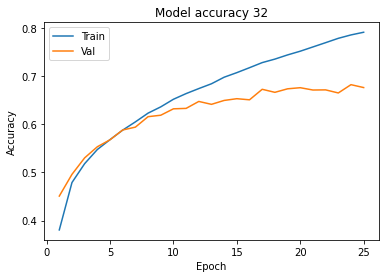

<Figure size 432x288 with 0 Axes>

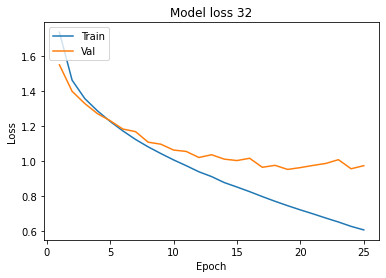

313/313 [==============================] - 9s 28ms/step - loss: 0.9727 - accuracy: 0.6760

Test score: 0.9726619124412537
Test accuracy:  0.6759999990463257
313/313 [==============================] - 8s 27ms/step
10000
y_pred: 5


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f39cd2b2a10>)

<Figure size 432x288 with 0 Axes>

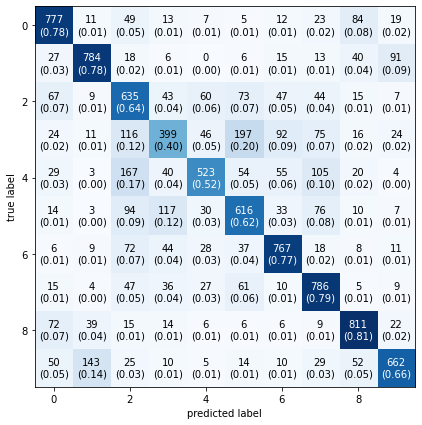

In [ ]:
# Define LeNet model
LeNet = Sequential()

LeNet.add(Conv2D(6, (5,5), activation = 'relu', input_shape= (32,32,3), strides=1, padding='same'))
LeNet.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))

LeNet.add(Conv2D(16, (5,5), activation = 'relu', strides=1, padding='same'))
LeNet.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))

LeNet.add(Conv2D(120, (5,5), activation = 'relu', padding='same'))

LeNet.add(Flatten())
LeNet.add(Dense(84, activation='relu'))
LeNet.add(Dense(10, activation='softmax'))

print("Layers:", len(LeNet.layers))
print("Layers:", LeNet.layers)
LeNet.summary()

def plot_learningCurve(history, epochs, comment = ''):
  # Plot training & validation accuracy values
  plt.figure()
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy' + ' ' + comment)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
  plt.savefig("accuracy.png")

  # Plot training & validation loss values
  plt.figure()
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss'+ ' ' + comment)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
  plt.savefig("loss.png")

### batch_size = 32

epochs = 25
learning_rate = 0.0001
batch_size = 32

model = LeNet

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=epochs,
          validation_data=(X_test, Y_test))

plot_learningCurve(history, epochs, str(batch_size))

score = model.evaluate(X_test, Y_test)
print()
print('Test score:', score[0])
print('Test accuracy: ', score[1])


predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

# predictions = list(predictions)
# actuals = list(y_test)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

print(len(y_pred))
print('y_pred:', y_pred[0])
# print(y_pred)
# print('------------------')
# print(y_test)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

Layers: 8
Layers: [<keras.layers.convolutional.conv2d.Conv2D object at 0x7f39cd17b5d0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f39cd6f7910>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f39cd26ef90>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f39c98f5290>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f39cd682950>, <keras.layers.reshaping.flatten.Flatten object at 0x7f39cd29bc50>, <keras.layers.core.dense.Dense object at 0x7f39cd5b7dd0>, <keras.layers.core.dense.Dense object at 0x7f39cd155850>]
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 6)        0         
 2D)                                                             
                     

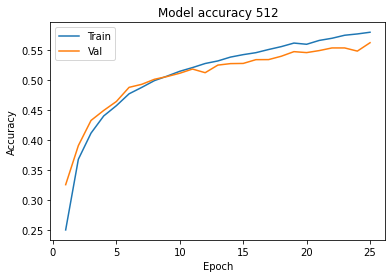

<Figure size 432x288 with 0 Axes>

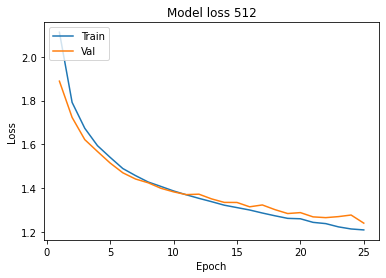

313/313 [==============================] - 8s 27ms/step - loss: 1.2396 - accuracy: 0.5627

Test score: 1.2396118640899658
Test accuracy:  0.5626999735832214
313/313 [==============================] - 9s 27ms/step
10000
y_pred: 6


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f39cd24de10>)

<Figure size 432x288 with 0 Axes>

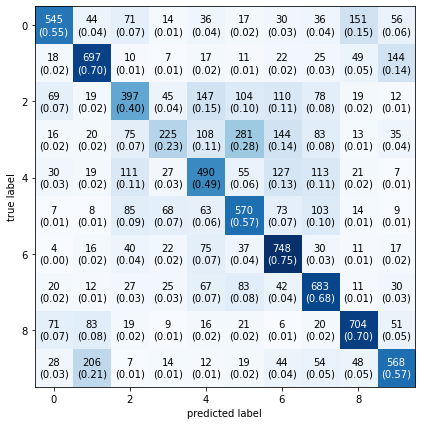

In [ ]:
# batch_size = 512

# Define LeNet model
LeNet = Sequential()

LeNet.add(Conv2D(6, (5,5), activation = 'relu', input_shape= (32,32,3), strides=1, padding='same'))
LeNet.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))

LeNet.add(Conv2D(16, (5,5), activation = 'relu', strides=1, padding='same'))
LeNet.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))

LeNet.add(Conv2D(120, (5,5), activation = 'relu', padding='same'))

LeNet.add(Flatten())
LeNet.add(Dense(84, activation='relu'))
LeNet.add(Dense(10, activation='softmax'))

print("Layers:", len(LeNet.layers))
print("Layers:", LeNet.layers)
LeNet.summary()

epochs = 25
learning_rate = 0.0001
batch_size = 512

model = LeNet

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=epochs,
          validation_data=(X_test, Y_test))

plot_learningCurve(history, epochs, str(batch_size))

score = model.evaluate(X_test, Y_test)
print()
print('Test score:', score[0])
print('Test accuracy: ', score[1])


predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

# predictions = list(predictions)
# actuals = list(y_test)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

print(len(y_pred))
print('y_pred:', y_pred[0])
# print(y_pred)
# print('------------------')
# print(y_test)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

Implement an equivalent feed forward network for the same task with each hidden layer
containing the same number of neurons as the number of filters in each convolution layer.
Use the ‘Adam’ optimizer to train your network on the CIFAR-10 dataset for a fixed set of
25 epochs.

X_train original shape (50000, 32, 32, 3)
y_train original shape (50000, 1)
X_test original shape (10000, 32, 32, 3)
y_test original shape (10000, 1)
(32, 32, 3)
y_test: [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
YY_test: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Layers: 6
Layers: [<keras.layers.core.dense.Dense object at 0x7f883944e610>, <keras.layers.core.dense.Dense object at 0x7f883924bf50>, <keras.layers.core.dense.Dense object at 0x7f88392e7750>, <keras.layers.reshaping.flatten.Flatten object at 0x7f883925fa90>, <keras.layers.core.dense.Dense object at 0x7f88394cb510>, <keras.layers.core.dense.Dense object at 0x7f8839207a50>]
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32, 32, 6)         24        
                                                                 
 dense_10 (Dense)            (None, 32, 32, 16)        112       
                         

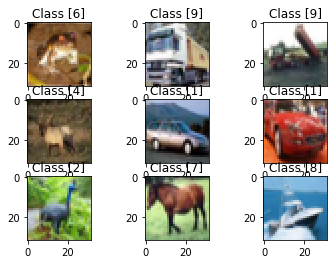

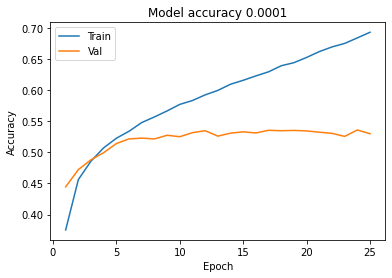

<Figure size 432x288 with 0 Axes>

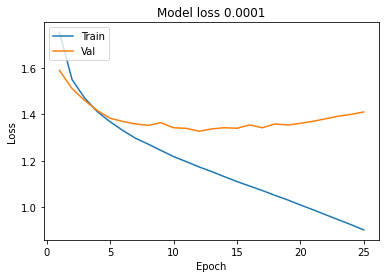

313/313 [==============================] - 10s 31ms/step - loss: 1.4099 - accuracy: 0.5300

Test score: 1.4098814725875854
Test accuracy:  0.5299999713897705
313/313 [==============================] - 11s 36ms/step
10000
y_pred: 8


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8839164350>)

<Figure size 432x288 with 0 Axes>

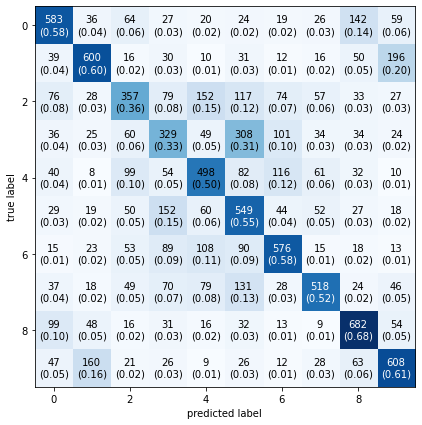

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.optimizers import Adam
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
# from keras.layers.advanced_activations import LeakyReLU 
from keras.layers import ELU, PReLU, LeakyReLU

from keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)


# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

# Display the samples
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

# # reshape the data to (28,28)
# X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
# X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape[1:])

number_of_classes = 10

# Converts a class vector (integers) to binary class matrix.
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

print('y_test:', y_test)
print('YY_test:', Y_test[0])

# Define FFNN model
FFNN = Sequential()
FFNN.add(Input(shape=(32,32,3)))
FFNN.add(Dense(6, activation='relu'))
FFNN.add(Dense(16, activation='relu'))
FFNN.add(Dense(120, activation='relu'))
FFNN.add(Flatten())
FFNN.add(Dense(84, activation='relu'))
FFNN.add(Dense(10, activation='softmax'))



# LeNet.add(Conv2D(6, (5,5), activation = 'relu', input_shape= (32,32,3), strides=1, padding='same'))


# LeNet.add(Conv2D(6, (5,5), activation = 'relu', input_shape= (32,32,3), strides=1, padding='same'))
# LeNet.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))

# LeNet.add(Conv2D(16, (5,5), activation = 'relu', strides=1, padding='same'))
# LeNet.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))

# LeNet.add(Conv2D(120, (5,5), activation = 'relu', padding='same'))

# LeNet.add(Flatten())
# LeNet.add(Dense(84, activation='relu'))
# LeNet.add(Dense(10, activation='softmax'))

print("Layers:", len(FFNN.layers))
print("Layers:", FFNN.layers)
FFNN.summary()


import matplotlib.pyplot as plt


def plot_learningCurve(history, epochs, comment = ''):
  # Plot training & validation accuracy values
  plt.figure()
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy' + ' ' + comment)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
  plt.savefig("accuracy.png")

  # Plot training & validation loss values
  plt.figure()
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss'+ ' ' + comment)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
  plt.savefig("loss.png")


epochs = 25
learning_rate = 0.0001
batch_size = 32

model = FFNN

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=epochs,
          validation_data=(X_test, Y_test))

plot_learningCurve(history, epochs, str(learning_rate))

score = model.evaluate(X_test, Y_test)
print()
print('Test score:', score[0])
print('Test accuracy: ', score[1])


predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

# predictions = list(predictions)
# actuals = list(y_test)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

print(len(y_pred))
print('y_pred:', y_pred[0])
# print(y_pred)
# print('------------------')
# print(y_test)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))


Qeustion 3

Question 3.1, 3.2, 3.3 please check the report file below:
https://github.com/RoboticsAndCloud/Machine_Learning_2022_Fall/blob/main/2022%20Machine%20Learning%20Assignment%203.pdf

Question3.2 code

In [ ]:
import numpy as np

def image_convolution_pad(matrix, kernel):
    # assuming kernel is symmetric and odd
    k_size = len(kernel)
    m_height, m_width = matrix.shape
    padded = np.pad(matrix, (k_size-1, k_size-1))
    print("padded")
    print(padded)
    
    # iterates through matrix, applies kernel, and sums
    output = []
    for i in range(m_height):
        for j in range(m_width):
            output.append(np.sum(padded[i:k_size+i, j:k_size+j]*kernel))

    output=np.array(output).reshape((m_height, m_width))
    return output

def image_convolution(matrix, kernel):
    # assuming kernel is symmetric and odd
    k_size = len(kernel)
    m_height, m_width = matrix.shape
    padded = matrix
    
    # iterates through matrix, applies kernel, and sums
    output = []
    for i in range(m_height-2):
        for j in range(m_width-2):
            output.append(np.sum(padded[i:k_size+i, j:k_size+j]*kernel))

    output=np.array(output).reshape((m_height-2, m_width-2))
    return output


X = np.array([[7, 5, 0, 0, 3, 2],
              [6, 4, 5, 1, 4, 8],
              [9, 0, 2, 2, 5, 4],
              [6, 3, 4, 7, 9, 8],
              [5, 7, 5, 6, 9, 0],
              [7, 9, 0, 8, 2, 3],
              ])

f = np.array([[1, 0, -1],
              [2, 0, -2],
              [1, 0, -1]])


output = image_convolution(X, f)
print("X*f output(With out Padding):")
print(output)


output = image_convolution_pad(X, f)
print("X*foutput(Padding):")
print(output)



X*f output(With out Padding):
[[ 16   9  -4 -18]
 [ 17  -5 -10 -12]
 [ 11  -9 -17   2]
 [  9  -1 -15  16]]
padded
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 7 5 0 0 3 2 0 0]
 [0 0 6 4 5 1 4 8 0 0]
 [0 0 9 0 2 2 5 4 0 0]
 [0 0 6 3 4 7 9 8 0 0]
 [0 0 5 7 5 6 9 0 0 0]
 [0 0 7 9 0 8 2 3 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
X*foutput(Padding):
[[ -7  -5   7   5  -3  -2]
 [-20 -14  15  13  -5 -11]
 [-28 -13  16   9  -4 -18]
 [-30  -7  17  -5 -10 -12]
 [-26 -13  11  -9 -17   2]
 [-23 -26   9  -1 -15  16]]
